In [1]:
from transformers import pipeline
import pandas as pd
import numpy as np
import textwrap

c:\Users\b.ludwicki\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("bbc_text_cls (1).csv")


In [3]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [4]:
doc = df[df.labels == 'business'] ['text'].sample(random_state=42)

In [5]:
doc.head()

480    Christmas sales worst since 1981\n\nUK retail ...
Name: text, dtype: object

In [19]:
import math
import matplotlib.pyplot as plt

x = [0.1, 0.5, 0.9, 1.3, 1.7]
y = []

for item in x:
    value = math.log(item)
    y.append(value)
    
print(y)

[-2.3025850929940455, -0.6931471805599453, -0.10536051565782628, 0.26236426446749106, 0.5306282510621704]


Text(0, 0.5, 'Y values')

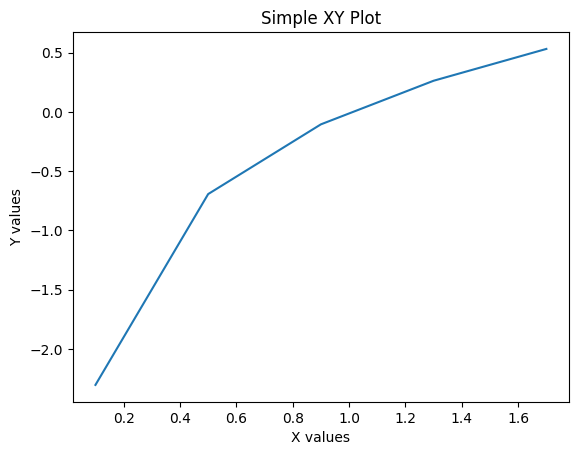

In [21]:
plt.plot(x, y)

plt.title("Simple XY Plot")
plt.xlabel("X values")
plt.ylabel("Y values")
